### Background
Cyclistic, a bike-share company that features more than 5,800 bicycles and 600 docking stations in Chicago launched in 2016. It provides three types of memberships to customers: 
1. Annual members (Member)
2. Single-ride passes (Causal)
3. Full-day passes (Causal)

The marketing analyst team at Cyclistic would like to convert more casual riders into members since the market awareness of the company brand and the mobility needs of the customers. To achieve that, the marketing team wants to know:
 - The behavior differences between annual members and causal riders
 - The reason would casual riders buy Cyclistic annual memberships
 - Strategies that Cyclistic use digital media to influence casual riders to become members



Additional information provided by case content:

available types of bikes that Cyclistic offers:
- reclining bikes
- hand tricycles
- cargo bikes
- two-wheeled bike
- traditional bikes

Cyclistic customers use bikes for different purposes, the following is a brief summary:
- About 30% use them to commute to work each day
- 8% of riders use the assistive options

Cyclistic users are more likely to ride for leisure and the majority of riders opt for traditional bikes

### Data
The data used in this case study is provided from Cyclistic. It can be found [here](https://divvy-tripdata.s3.amazonaws.com/index.html) 

The data license agreement can be viewed [here](https://ride.divvybikes.com/data-license-agreement)

This case study only uses the data from **202101-divvy-tripdata.zip** to **202112-divvy-tripdata.zip**

Each file contains 13 features:
- "ride_id"  -Id for riding bike
- "rideable_type"  - Types of bikes (docked/electric/classic)       
- "started_at"  - The start time for using a bike           
- "ended_at"   - The end time for using a bike         
- "start_station_name"  - The start station name  
- "start_station_id"   - The start station ID
- "end_station_name"   - The end station name   
- "end_station_id"      - The end station name ID 
- "start_lat"           - The start point using biking latitude
- "start_lng"            - The start point using biking longtitude
- "end_lat"             - The end point using biking latitude
- "end_lng"             - The end point using biking longtitude
- "member_casual"      - Types of member(member/causal) 

### Task
This case study is only for discovering and sharing Cyclistic customer behavior differences in 2021.

### Limitations on data
The given data is in the year 2021 and it only shows Cyclistic users' activities during the pandemic. It does not reflect the whole group patterns in general. The market reacts to the needs of using Cyclistic services may vary from time to time. The given features in datasets do not provide the purpose of using bikes. Each ride ID is unique, and cannot be formed as a group to conduct biking purposes for inviduals.

### Findings 
The finding will summarize the behaviors of causal riders and members in the following steps:
1. Total numbers in each group:
    - The Cyclistic total users are around 5.5 million.
    - Around 46% of the total users are causal bikers
    - The size of casual bikers can be made up of 83.3% members approximately.

2. Bike preference in each group:
    - Members only use classic and electric bikes.
    - Causal bikers use all types of bikes. (electric, classic, and docked).
    - Both groups start to increase dramatically from Feb and reach the peak in Jun(Causal) and Aug or Sep(Members)
    - Causal bikers have the largest size of total people from Jun to Aug for all different bikes, this also applies to causal riders on electric bikes
    - Member reaches its 3-peak months over a year from July to Sept for two different bikes.
    
3. A week of days for each group:
    - Member bikes from Monday to Friday more in general
    - Causal riders bike more during Weekends especially from Apr to Oct
    
4. Daytime(AM/PM) of using bikes for each group:
    - The majority of Cyclistic prefer to bike in the afternoon for both groups, however, there is a big difference in AM and PM for both groups.
    - In the morning, there are more members biking than causal riders in general. From Aug to Nov, the member group has the greatest size over the entire year. For casual riders, it has the largest group size from Jun to Aug.
    - These time frames, Aug-Nov for members and Jun-Sep for causal riders also apply in the afternoon. Causal riders have more people than members from Jun to Sep.
    
5. A week of days on bike preference for each group:
    - Casual bikers have more people than members from May to Sep during the weekend for electrical and classic bikes. However, causal bikers keep using electrical bikes and last this situation until Oct.

6. Average biking time and maximum ride length for each group:
    - Causal riders spend more time biking than members each month. However, this should be checked with more data points since monthly variations for each group difference is huge. Statistically, only data on May or Jun can prove the statement.
    - Interesting, the average monthly member riding bikes is around 1500 minutes each month. 
    - For casual riders, there are people more than 1500 minutes of biking each month. The peak-3 month in this category happens from May to Jun. 
    
### Conclusion and Recommendations
Based on data analysis, causal riders prefer to ride electric bikes more than classic bikes during the weekend in the afternoon. Especially from Jun to Aug. Additionally, there are no annual members for docked bikes, because there are no members using dock bikes. Otherwise, this should be confirmed with Cyclistic to avoid bias.

Recommendations: 
- Create a seasonal pass for causal riders or a weekly pass for causal riders for visiting or seasonal needs
- Create an incentive program for docked bikes


### More information for further analysis
If there is a dataset for bike point names with their geographic coordinate points. A heatmap can be developed based on users to see their activities each month.
Moreover, to understand the biking purpose for members, it would be better to have user_id to retrieve their activities and promote the benefits of being Cyclistic members.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

### Explore Data Analysis
Taking one dataset to do analysis before combining them together

In [2]:
#load the data
tripdata_2021_01 = pd.read_csv("datasets/202101-divvy-tripdata.csv")

In [3]:
tripdata_2021_01.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
tripdata_2021_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB


In [5]:
tripdata_2021_01.describe()

,start_lat,start_lng,end_lat,end_lng
count,96834.000000,96834.000000,96731.000000,96731.000000
mean,41.900482,-87.646076,41.900594,-87.646288
std,0.047050,0.027148,0.047140,0.027215
min,41.640000,-87.780000,41.640000,-87.810000
25%,41.881320,-87.660285,41.881320,-87.660984
50%,41.896857,-87.643118,41.896910,-87.643525
75%,41.929143,-87.629544,41.929466,-87.629544
max,42.064854,-87.528232,42.070000,-87.510000


### Converting the data into right datatype

In [6]:
# convert started_at and ended_at with right datatime
tripdata_2021_01["started_at"] = pd.to_datetime(tripdata_2021_01["started_at"])
tripdata_2021_01["ended_at"] = pd.to_datetime(tripdata_2021_01["ended_at"])

### Creating the new columns for ride length in minutes

In [7]:
#calculate duration of biking in minutes
tripdata_2021_01["ride_length"] = (tripdata_2021_01.ended_at - tripdata_2021_01.started_at)/np.timedelta64(1, 'm')

### Creating a daytime column for AM or PM based on started_at values

In [8]:
#travel time for
tripdata_2021_01["daytime"] = tripdata_2021_01["started_at"].apply(lambda x: "AM" if x.hour < 12 else "PM")

### Create a weekday column for Monday to Sunday represented as from 1 to 7 respectively

In [9]:
#weekday start from 1 - 7 as it goes from Mon - Sun
tripdata_2021_01["weekday"] = tripdata_2021_01.started_at.dt.weekday+1

### Checking missing values

In [10]:
tripdata_2021_01.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
ride_length               0
daytime                   0
weekday                   0
dtype: int64

### Final dataframe based on non-missing values

In [11]:
tripdata_2021_01[["started_at", "ride_length", "daytime","weekday", "start_lat", "start_lng","rideable_type", "member_casual"]]

,started_at,ride_length,daytime,weekday,start_lat,start_lng,rideable_type,member_casual
0,2021-01-23 16:14:19,10.416667,PM,6,41.900341,-87.696743,electric_bike,member
1,2021-01-27 18:43:08,4.066667,PM,3,41.900333,-87.696707,electric_bike,member
2,2021-01-21 22:35:54,1.333333,PM,4,41.900313,-87.696643,electric_bike,member
3,2021-01-07 13:31:13,11.700000,PM,4,41.900399,-87.696662,electric_bike,member
4,2021-01-23 02:24:02,0.716667,AM,6,41.900326,-87.696697,electric_bike,casual
...,...,...,...,...,...,...,...,...
96829,2021-01-19 19:03:17,66.766667,PM,2,41.880958,-87.616743,classic_bike,member
96830,2021-01-05 18:42:27,51.100000,PM,2,41.880958,-87.616743,classic_bike,member
96831,2021-01-07 17:59:47,94.266667,PM,4,41.984037,-87.652310,classic_bike,member
96832,2021-01-06 19:20:31,81.433333,PM,3,41.984037,-87.652310,classic_bike,member


### Write a function as transfer data for previous steps, start from converting datatype up to the final dataframe

In [12]:
def transfer_data(df):
    """
    This function take a dataframe as an input and return the dataframe after transformation
    """
    # convert started_at and ended_at with right datatime
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["ended_at"] = pd.to_datetime(df["ended_at"])
    
    #calculate duration of biking 
    df["ride_length"] = df.ended_at - df.started_at

    #travel time in AM or PM
    df["daytime"] = df["started_at"].apply(lambda x: "AM" if x.hour < 12 else "PM")
    
    #weekday start from 1 - 7 as it goes from Mon - Sun
    df["weekday"] = df.started_at.dt.weekday+1
    
    # sort the df ascending orders respect to the started_at
    df = df.sort_values(by=["started_at"])
    return df[["started_at", "ended_at", "ride_length", "daytime","weekday", "start_lat", "start_lng","rideable_type", "member_casual"]]

### Looping through whole datasets from 202101 to 202112 and applying transfer_data function to them

In [13]:
#loading datasets into the list
ls = [pd.read_csv('datasets/'+i) for i in os.listdir('datasets')]

# concat all data as one
df = pd.concat(ls, axis=0, ignore_index=True)

#apply the transfer function
df_new = transfer_data(df)

In [14]:
#check the number of unique ride_id
df.ride_id.nunique() == df.shape[0]

True

### Checking the dataframe after transferring on data type and its values

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 73670 to 5448258
Data columns (total 9 columns):
 #   Column         Dtype          
---  ------         -----          
 0   started_at     datetime64[ns] 
 1   ended_at       datetime64[ns] 
 2   ride_length    timedelta64[ns]
 3   daytime        object         
 4   weekday        int64          
 5   start_lat      float64        
 6   start_lng      float64        
 7   rideable_type  object         
 8   member_casual  object         
dtypes: datetime64[ns](2), float64(2), int64(1), object(3), timedelta64[ns](1)
memory usage: 426.9+ MB


In [16]:
df_new.describe()

,ride_length,weekday,start_lat,start_lng
count,5595063,5.595063e+06,5.595063e+06,5.595063e+06
mean,0 days 00:21:56.120689,4.182436e+00,4.190107e+01,-8.764605e+01
std,0 days 02:58:20.085105,1.998339e+00,4.608635e-02,2.872111e-02
min,-1 days +23:01:58,1.000000e+00,4.164000e+01,-8.784000e+01
25%,0 days 00:06:45,2.000000e+00,4.188155e+01,-8.766000e+01
50%,0 days 00:12:00,4.000000e+00,4.189897e+01,-8.764182e+01
75%,0 days 00:21:47,6.000000e+00,4.192914e+01,-8.762773e+01
max,38 days 20:24:09,7.000000e+00,4.207000e+01,-8.752000e+01


### From ride_length columns, the min value should be positive

In [17]:
# fixing the ride length is negative
cond = df_new.ended_at < df_new.started_at
for index, row in df_new[cond].iterrows():
    df_new.loc[index, ['started_at']], df_new.loc[index, ['ended_at']] = row['ended_at'], row['started_at']
    df_new.loc[index,['ride_length']] =  row['started_at'] - row['ended_at']

In [18]:
#check on df_new dataframe after correction 
df_new.describe()

,ride_length,weekday,start_lat,start_lng
count,5595063,5.595063e+06,5.595063e+06,5.595063e+06
mean,0 days 00:21:56.169580,4.182436e+00,4.190107e+01,-8.764605e+01
std,0 days 02:58:20.079091,1.998339e+00,4.608635e-02,2.872111e-02
min,0 days 00:00:00,1.000000e+00,4.164000e+01,-8.784000e+01
25%,0 days 00:06:45,2.000000e+00,4.188155e+01,-8.766000e+01
50%,0 days 00:12:00,4.000000e+00,4.189897e+01,-8.764182e+01
75%,0 days 00:21:47,6.000000e+00,4.192914e+01,-8.762773e+01
max,38 days 20:24:09,7.000000e+00,4.207000e+01,-8.752000e+01


In [23]:
#convert into minutes
df_new.ride_length= df_new.ride_length/np.timedelta64(1, 'm') 

In [25]:
#dropping the data less than one minute
df_new = df_new.drop(df_new[df_new.ride_length < 1].index)

### Save a copy of datasets after cleaning 

In [26]:
df_new.to_csv("clean_data.csv", index=False)

### Perform visualizations on datasets
Let us check on the membership situation in 2021 first.

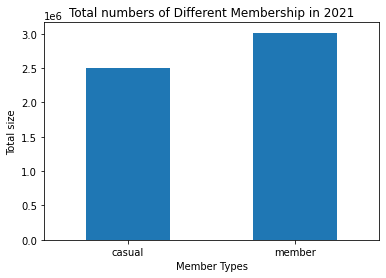

In [27]:
#check total membership in 2021
yearly_member_casual= df_new.groupby(['member_casual']).size().reset_index(name ="total_numbers")

#ploting the bar graph
yearly_member_casual.plot.bar( x="member_casual", rot=0)
plt.xlabel("Member Types")
plt.ylabel("Total size")
plt.title("Total numbers of Different Membership in 2021")
plt.legend().remove()
plt.show()

The Cyclistic casual member is around 46% of whole total members, which is around 83.3% of Cyclistic members at the base of one million. This could be a profitable segment for Cyclistic if converting casual to member successfully with the right marketing strategies. 

Let us check on Cyclistic users' activities in terms of time.

###  Developed plot function to view differents based on the time measurements

In [28]:
def statics_plot(df, name, cat, monthly=True):
    # plot the bar graph of df based on different categories
    # input dataframe df
    #        name, the name of title
    #        cat, string for categories
    #        monthly, binary for plotting monthly graph or not
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid")
    
    sns.barplot(x=df.columns[0], y=df.columns[-1], hue=cat, data=df)
    if monthly:
        plt.xlabel("month")
        plt.title("Monthly " + name +" in 2021")
    else:
        plt.title(name)
    plt.legend(loc='upper left')
    plt.show()

### Check montly total different Cyclistic members

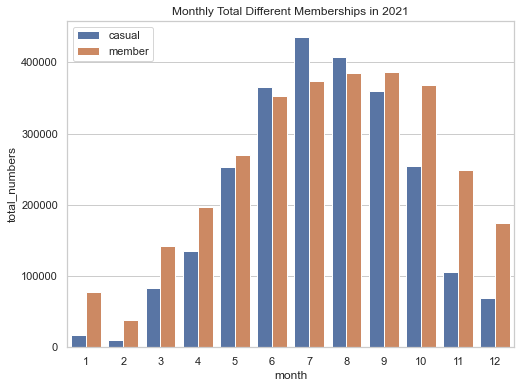

In [29]:
monthly_member_casual= df_new.groupby([df_new.started_at.dt.month,'member_casual']).size().reset_index(name ="total_numbers")

#ploting the bar graph
statics_plot(monthly_member_casual,"Total Different Memberships","member_casual" )

In [30]:
monthly_member_casual

,started_at,member_casual,total_numbers
0,1,casual,17842
1,1,member,77575
2,2,casual,9964
3,2,member,38685
4,3,casual,83148
5,3,member,142375
6,4,casual,134945
7,4,member,197478
8,5,casual,253346
9,5,member,269897


From the Monthly Total Different Memberships in 2021 bar graph, it can be noticed that Cyclistic members start to increase from Feb and reach their peak in Aug or Sept then slowly decline.

Similarly, Cyclistic casual riders start to grow from Feb and reach their peak in June then slowly decline. However, there are more than 150,000 Cyclistic members whereas causal riders are less than 100,000 in December.

Surprisingly, the number of causal riders exceeds the number of members from June to August.

Let us check the user bike preferences each month.

In [31]:
#check the unqiue rideable_type values
df_new.rideable_type.unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [32]:
#plot monthly rideable_type for each membership categories
monthly_rideable_type_member_casual= df_new.groupby([df_new.started_at.dt.month,'rideable_type','member_casual']).size().reset_index(name="total_numbers")

#split rideable types
classic_bike = monthly_rideable_type_member_casual[monthly_rideable_type_member_casual.rideable_type == "classic_bike"]
docked_bike = monthly_rideable_type_member_casual[monthly_rideable_type_member_casual.rideable_type == "docked_bike"]
electric_bike = monthly_rideable_type_member_casual[monthly_rideable_type_member_casual.rideable_type == "electric_bike"]

### Plotting classic bikes

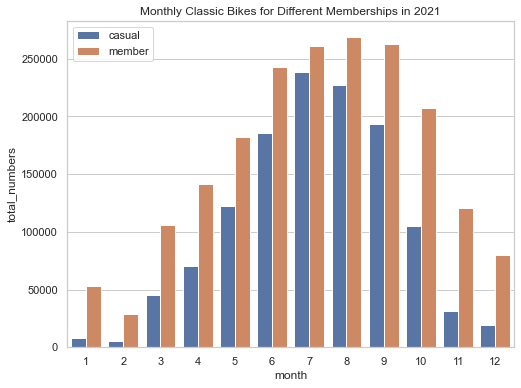

In [33]:
statics_plot(classic_bike, "Classic Bikes for Different Memberships","member_casual")

### Plotting docked bikes

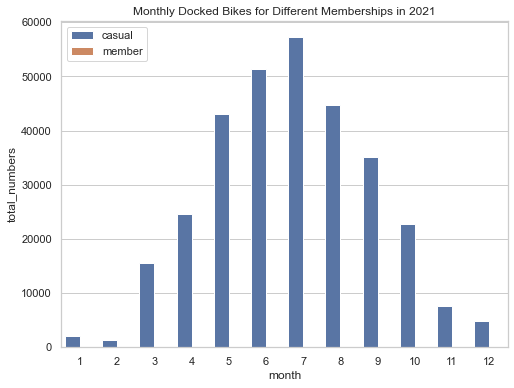

In [34]:
statics_plot(docked_bike, "Docked Bikes for Different Memberships","member_casual")

### Plotting electric bikes

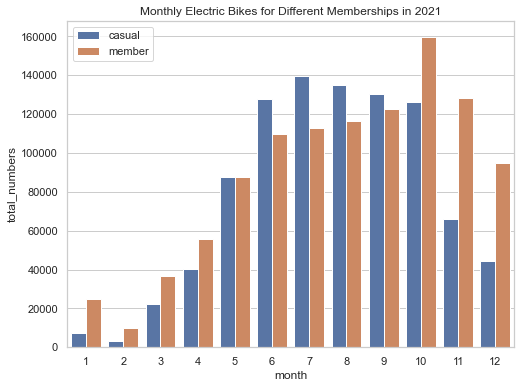

In [35]:
statics_plot(electric_bike, "Electric Bikes for Different Memberships","member_casual")

Interestingly, we only see the causal riders on dock bike plotting. However, members prefer electric and classic bikes.

From the classic bike plot, it follows a similar growth tendency as the graph of Monthly Total Different Memberships in 2021. However, the major contribution that causal riders exceed members in Cyclistic is from docked bikes and electric bikes from June to August. 

For these three months, each type of bike has the largest total causal users in 2021. The significant increasing demand for using docked and electric bikes happens in February.

Additionally, from the electrical bikes plot, causal riders exceed member electrical bikes from May to September. However, member electric bikes reach their yearly peak point in October.

Seasonal needs for different bikes is one of the major factors to make causal riders and member act differently.

Let us check on the features of weekday and daytime, and how these two factors tell us the difference between causal riders and members.

### Plot yearly weekday on different memberships

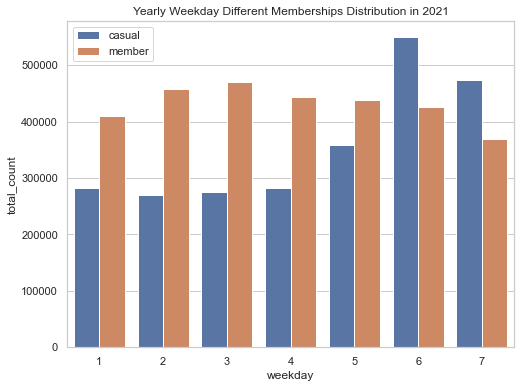

In [36]:
# preference in time
yearly_weekday = df_new.groupby(['weekday','member_casual']).size().reset_index(name="total_count")
statics_plot(yearly_weekday, "Yearly Weekday Different Memberships Distribution in 2021", "member_casual", False)

In general, members use Cyclistic service more than causal riders from Monday to Friday. However, causal riders dominate the usage of Cyclistic services during the weekend.

### creating a plot function for montly days of a week

In [37]:
def monthly_weekday_plot(df):
    """
    This function is for ploting monthly weekday plot
    input : df -> dataframe 
    output: barplot of each monthly weekday 
    """
    plt.subplots(figsize = (16,25))
    for i in range(1,13):
        ax = plt.subplot(4, 3, i )
      # get each month data
        df_month = df[df.started_at == i].drop(columns ="started_at")
        
        #plot bar
        sns.barplot(ax=ax, x=df_month.columns[0], y=df_month.columns[-1], hue=df_month.columns[1], data=df_month)
        
        #set the title and legend location
        ax.set_title(dt.datetime.strptime(str(i), "%m").strftime("%b"))
        ax.legend(loc="best", fontsize="x-small", bbox_to_anchor=(1, 1))

    plt.subplots_adjust(wspace=0.5, hspace= 0.3)
    plt.show()

Monthly Different Bike Memberships in a week in 2021


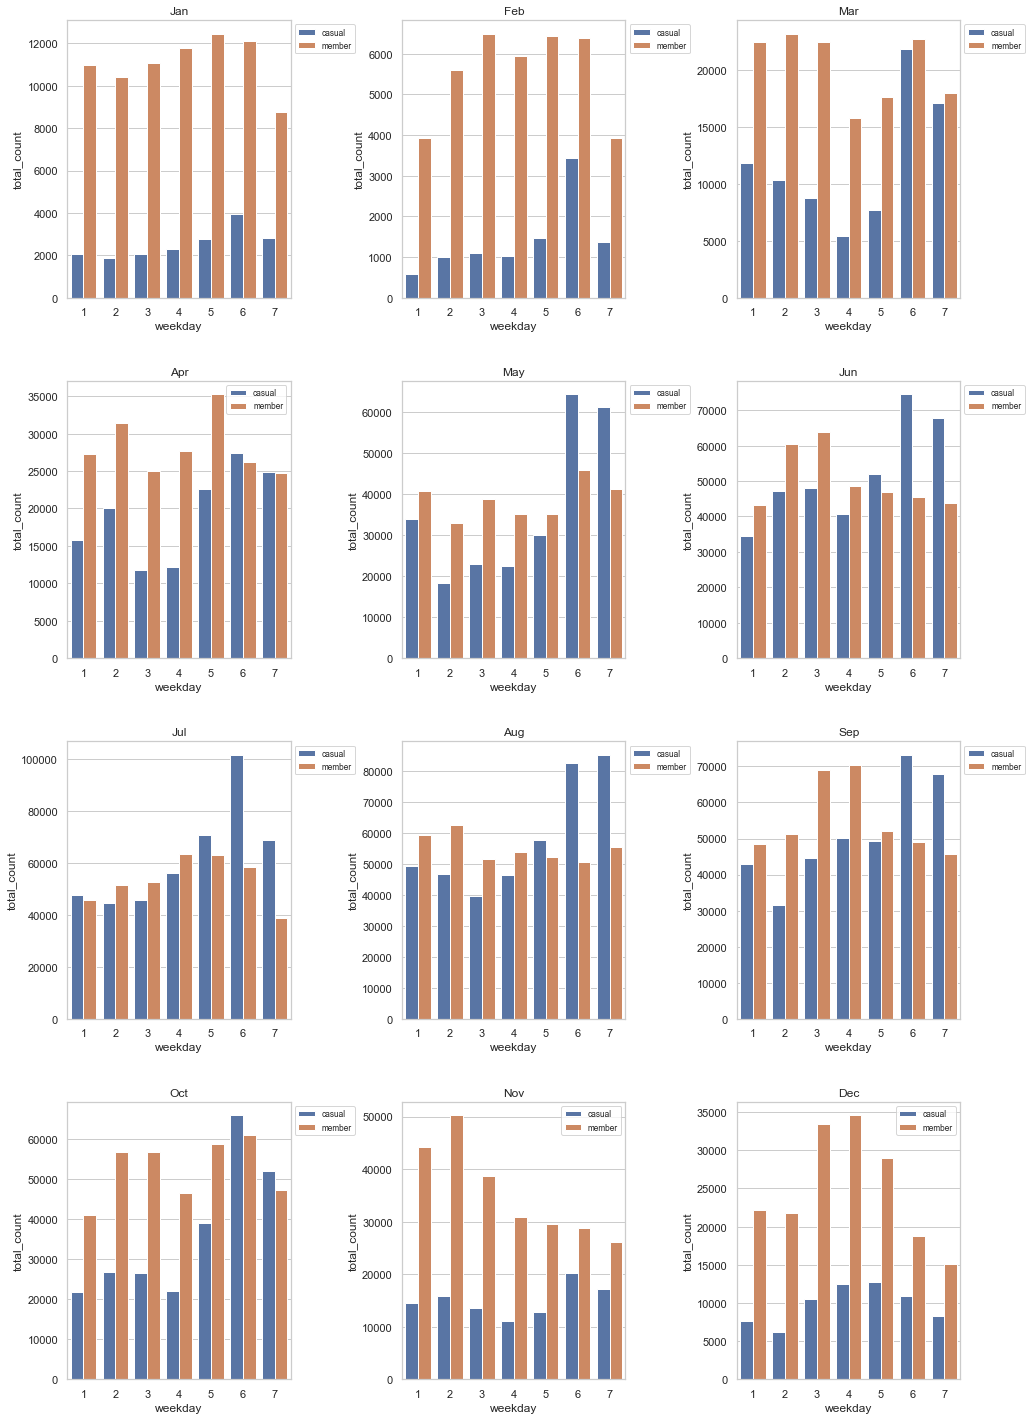

In [38]:
#monthly weekday general glance 
monthly_weekday = df_new.groupby([df_new.started_at.dt.month,'weekday','member_casual']).size().reset_index(name="total_count")
print("Monthly Different Bike Memberships in a week in 2021")
monthly_weekday_plot(monthly_weekday)

In general, from Jan to Feb, members are the major group using Cyclistic services from Monday to Sunday.
However, starting on the weekend of Mar, causal riders increase significantly and it begins to surpass the member during the weekend of Apr. This situation lasts until Nov. From Jun to Aug, Friday, Saturday and Sunday become the most popular days for causal riders, which has more causal riders than members during weekdays. 

Let us check on daytime Cyclistic users' activities.

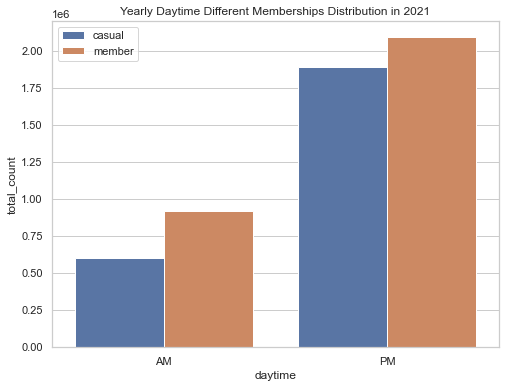

In [39]:
yearly_daytime = df_new.groupby(['daytime','member_casual']).size().reset_index(name="total_count")
statics_plot(yearly_daytime,"Yearly Daytime Different Memberships Distribution in 2021", "member_casual", False)

The majority of Cyclistic users prefer biking in the afternoon. 

This does not tell us too much about different member preferences. Let us check on monthly different users using bikes based on the daytime.

In [40]:
#get the monthly daytime for different members information
monthly_daytime = df_new.groupby([df_new.started_at.dt.month, 'daytime','member_casual']).size().reset_index(name="total_count")
am = monthly_daytime[monthly_daytime.daytime =="AM"]
pm = monthly_daytime[monthly_daytime.daytime =="PM"]

### Plotting users using bikes in the morning.

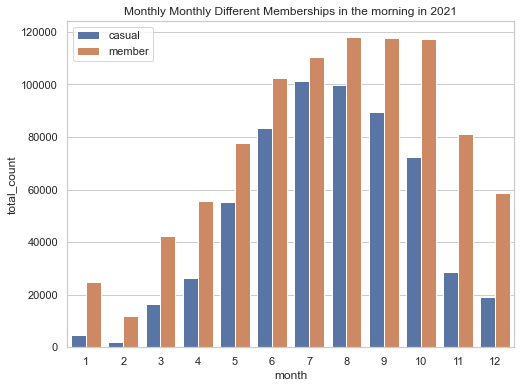

In [41]:
statics_plot(am, "Monthly Different Memberships in the morning", "member_casual")

### Plotting users using bikes in the afternoon

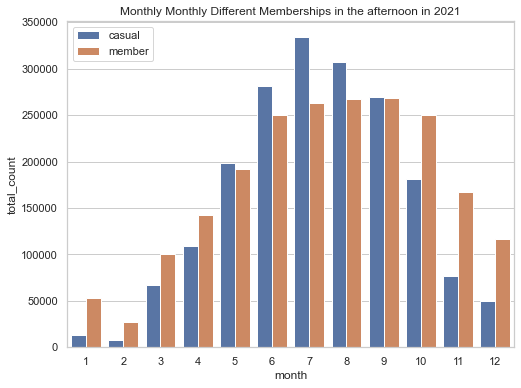

In [42]:
statics_plot(pm, "Monthly Different Memberships in the afternoon", "member_casual")

In general, most Cyclistic customers prefer biking in the afternoon since the scale of plotting afternoon bike users  is 
larger than the scale of plotting morning bike users.

The members of Cyclistic use bikes more than causal riders in the morning. 

On the other hand, Causal riders prefer to bike in the afternoon.
From May to Sept, bike users are greater than member riders in the afternoon.

Let us check the bike preference during weekdays.

 ### Extracting bike preference during days of a week

In [43]:
monthly_weekday_rideable_type = df_new.groupby([df_new.started_at.dt.month,'weekday','rideable_type','member_casual']).size().reset_index(name="total_count")
#classic bike
classic_bike_weekday = monthly_weekday_rideable_type[monthly_weekday_rideable_type.rideable_type == "classic_bike"].drop(columns="rideable_type")

#electric bike
electric_bike_weekday = monthly_weekday_rideable_type[monthly_weekday_rideable_type.rideable_type == "electric_bike"].drop(columns="rideable_type")


### Plotting monthly on using classic bikes in a week

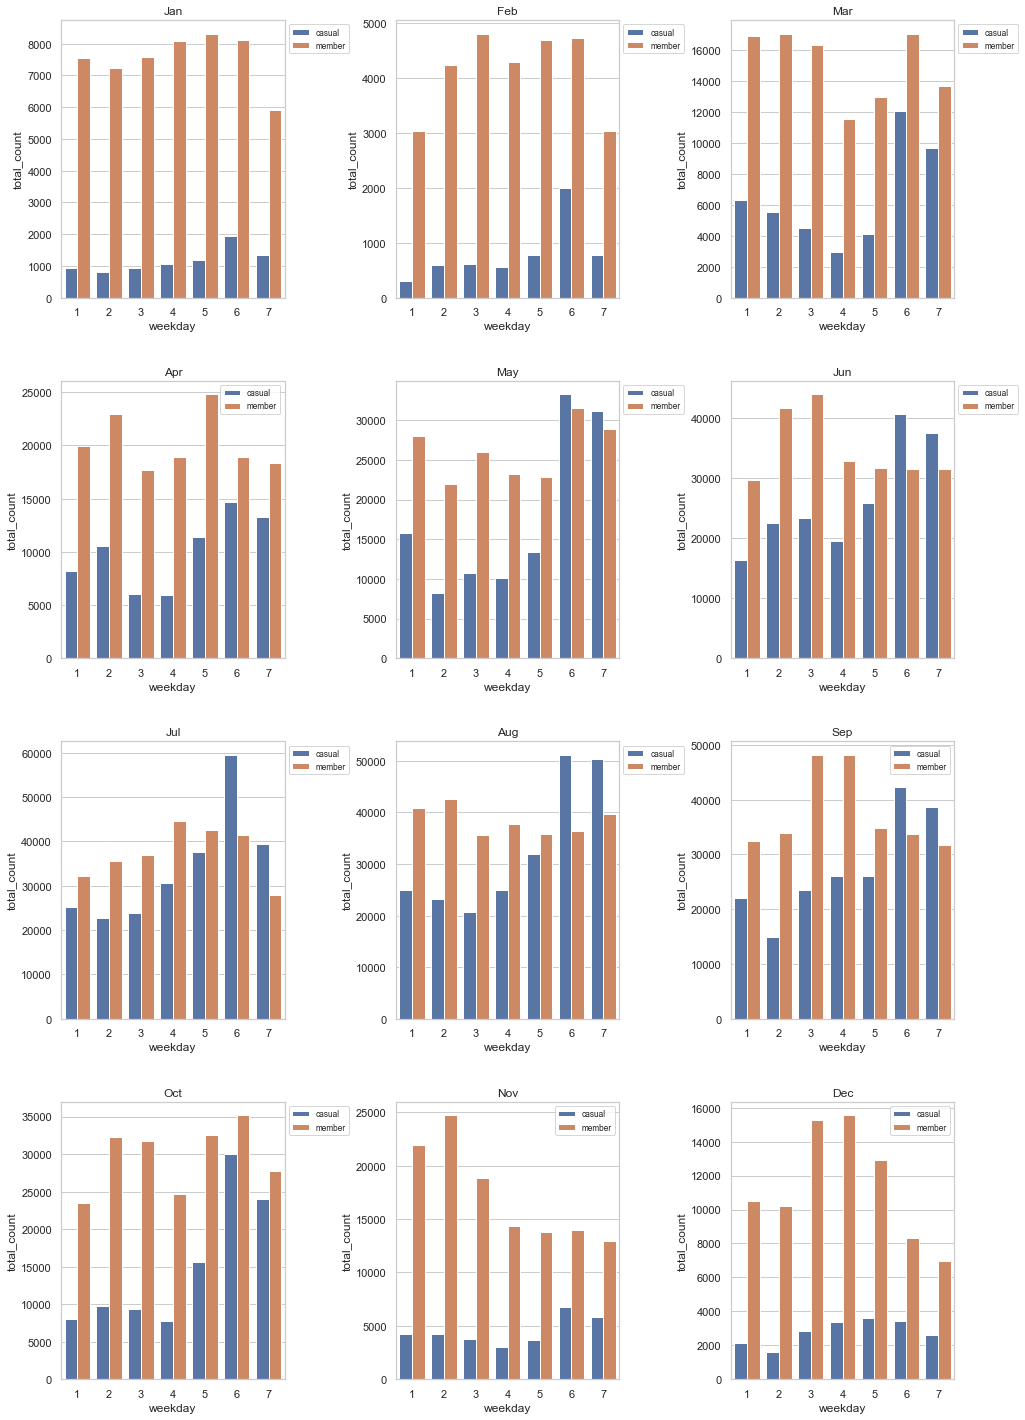

In [44]:
monthly_weekday_plot(classic_bike_weekday)

### Plotting monthly on using electric bikes in a week

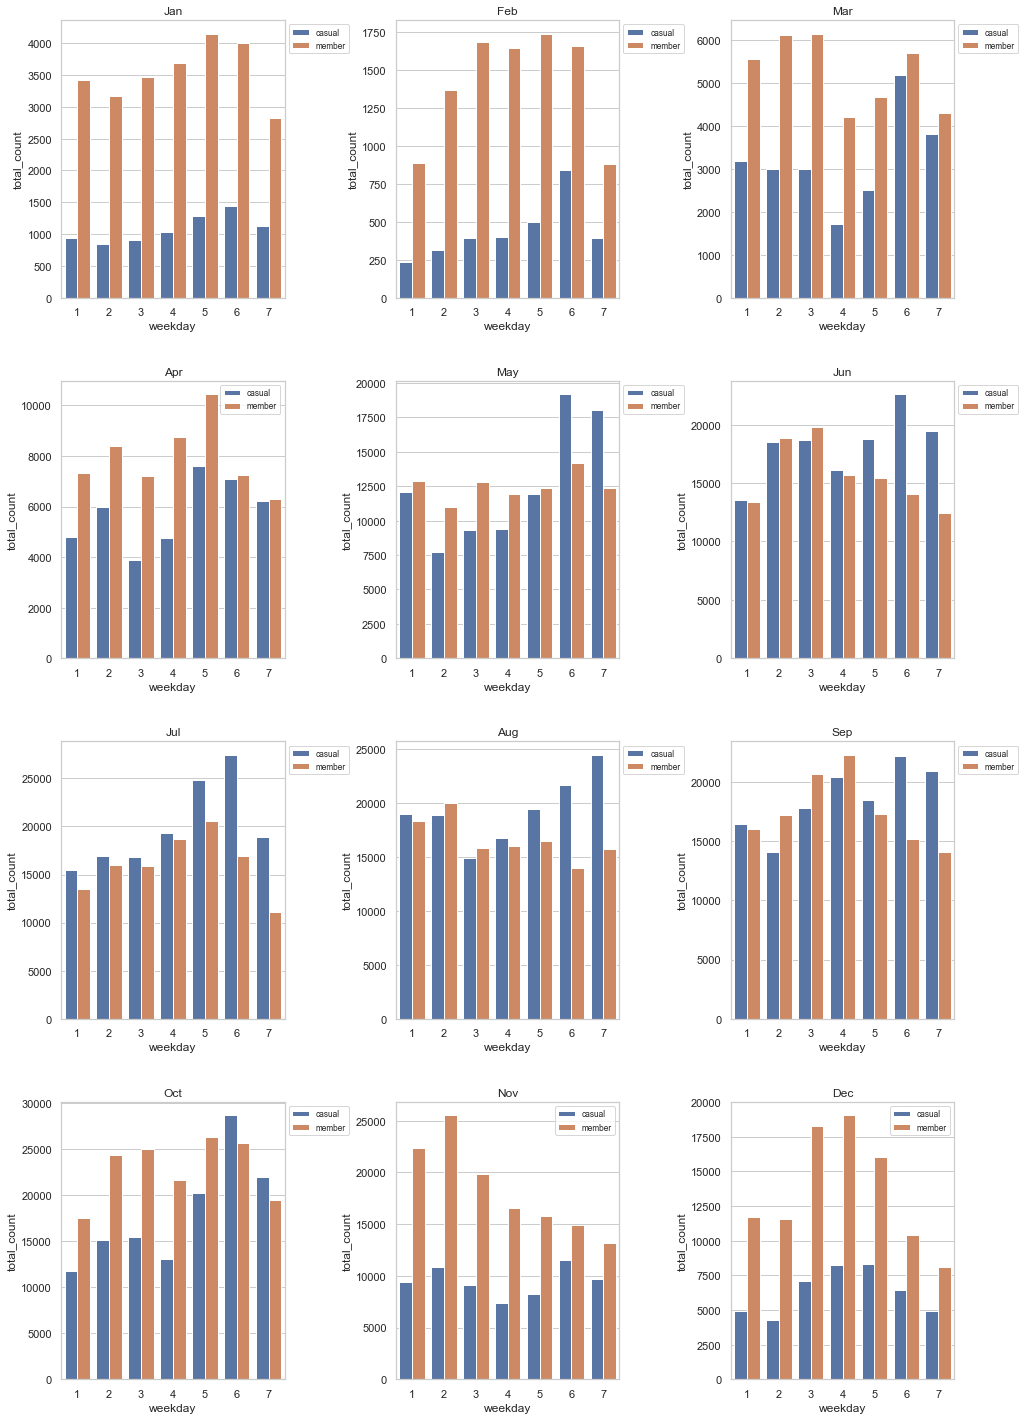

In [45]:
monthly_weekday_plot(electric_bike_weekday)

Both monthly weekday plots on classic and electrical bikes show the weekday has a greater number of casual users than members from May to Sep. However, electrical bikes have higher demand than classic bikes for casual riders. It still has more causal users than members on weekends in Oct. Especially, from Jun to Aug, electrical causal riders have more people than or similar to the electrical member from Mondays to Fridays.

### Create some statistical table to view difference for members and causal riders

In [46]:
#check avergae monthly ride length, the max ride length, total numbers of each month for casual and member
member_stat = df_new.groupby([df_new.started_at.dt.month, "member_casual"]).agg(
    avg_ride_length = ('ride_length', 'mean'),
    max_ride_length = ('ride_length', 'max'),
    total_people = ('ride_length','count')
).reset_index()

In [47]:
member_stat

,started_at,member_casual,avg_ride_length,max_ride_length,total_people
0,1,casual,26.074310,19825.916667,17842
1,1,member,13.055667,1499.950000,77575
2,2,casual,50.193251,30129.233333,9964
3,2,member,18.389424,1499.950000,38685
4,3,casual,38.560403,31681.650000,83148
5,3,member,14.169003,1559.933333,142375
6,4,casual,38.484447,47776.700000,134945
7,4,member,14.917414,1499.933333,197478
8,5,casual,38.763979,53921.600000,253346
9,5,member,14.893639,1499.933333,269897


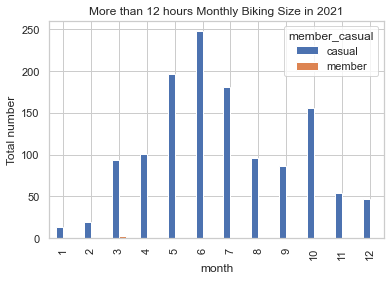

In [48]:
df_new[df_new.ride_length > 1500].groupby([df_new.started_at.dt.month, "member_casual"]).size().unstack("member_casual").plot(kind="bar")
plt.title("More than 12 hours Monthly Biking Size in 2021")
plt.xlabel("month")
plt.ylabel("Total number")
plt.show()

From the member stat, the average causal riders spend at least two times of time than members do. However, the size of casual riders is significantly smaller than member size. Therefore, this is not useful information. However, if we check the data on May(5) and June(6), this can be considered a valid reference since they have small variations in the total numbers.


Oddly, the monthly maximum ride length for members is almost the same, which is 1500 minutes. However, the variation of causal riders on maximum ride length changes on month. Especially, from May to June, which has the largest number of causal riders bike more than 1500 minutes each month.